In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [3]:
sales=pd.read_excel('superstore.xlsx')
sales.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

In [5]:
sales.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### most selling products

In [9]:
top_ten_products=sales.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False)[:10]
top_ten_products

Product Name
Staples                                                       215
Staple envelope                                               170
Easy-staple paper                                             150
Staples in misc. colors                                        86
KI Adjustable-Height Table                                     74
Avery Non-Stick Binders                                        71
Storex Dura Pro Binders                                        71
GBC Premium Transparent Covers with Diagonal Lined Pattern     67
Situations Contoured Folding Chairs, 4/Set                     64
Staple-based wall hangings                                     62
Name: Quantity, dtype: int64

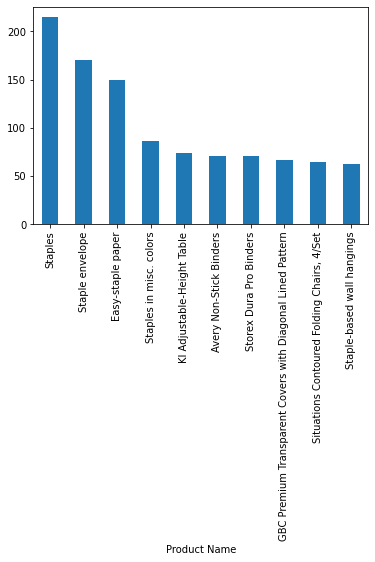

In [10]:
plt.xticks(rotation=90)
top_ten_products.plot(x=top_ten_products.index,y=top_ten_products,kind='bar')
plt.show()

### Total sales by year

In [78]:
sales['year']=sales['Ship Date'].dt.year

In [101]:
sales_by_year=sales.groupby('year')['Sales'].sum().sort_values(ascending=False).reset_index()
sales_by_year

,year,Sales
0,2017,730889.7154
1,2016,611325.7530
2,2015,479442.5020
3,2014,470383.1931
4,2018,5159.6968


In [103]:
year2018=sales[sales['year']==2018]
year2018.shape

(42, 22)

Looks like not much data for 2018 is vavailable, so i get rid of it 

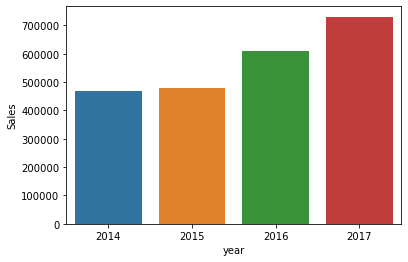

In [102]:
sales_by_year=sales_by_year.iloc[0:4]
sns.barplot(data=sales_by_year,x='year',y='Sales')
plt.show()

### sales by month

In [81]:
sales['month']=sales['Ship Date'].dt.month

In [109]:
sales_by_month=sales.groupby('month')['Sales'].sum().sort_values(ascending=False).reset_index()
sales_by_month

,month,Sales
0,12,340517.2922
1,11,330681.7425
2,9,304631.1559
3,10,204727.0530
4,3,191665.3060
5,6,161335.7057
6,8,154153.1555
7,7,148170.6410
8,5,146361.9499
9,4,136953.6968


In [110]:
# convert the numbered months to month names
import calendar
month_names=[]
for i in sales_by_month['month']:
    month_names.append(calendar.month_name[i])
month_names

['December',
 'November',
 'September',
 'October',
 'March',
 'June',
 'August',
 'July',
 'May',
 'April',
 'January',
 'February']

In [111]:
sales_by_month.insert(loc=1,column='month_name',value=month_names)
sales_by_month

,month,month_name,Sales
0,12,December,340517.2922
1,11,November,330681.7425
2,9,September,304631.1559
3,10,October,204727.0530
4,3,March,191665.3060
5,6,June,161335.7057
6,8,August,154153.1555
7,7,July,148170.6410
8,5,May,146361.9499
9,4,April,136953.6968


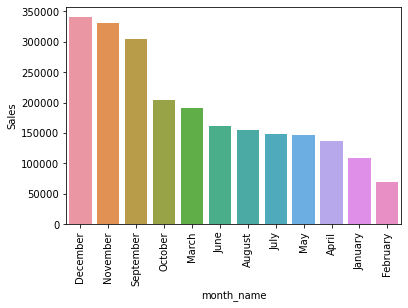

In [113]:
plt.xticks(rotation='vertical')
sns.barplot(data=sales_by_month,x='month_name',y='Sales')
plt.show()

### top 10 products by sales

In [8]:
top_products_by_sales=sales.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)
top_products_by_sales[:10]

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64

### most profitable products

In [12]:
top_ten_profitable_products=sales.groupby('Product Name')['Profit'].sum().sort_values(ascending=False)[:10]
top_ten_profitable_products

Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Ativa V4110MDD Micro-Cut Shredder                                               3772.9461
3D Systems Cube Printer, 2nd Generation, Magenta                                3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System                      3696.2820
Ibico EPK-21 Electric Binding System                                            3345.2823
Zebra ZM400 Thermal Label Printer                                               3343.5360
Name: Profit, dtype: float64

In [19]:
top_sales_and_profits=sales.groupby('Product Name')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False).reset_index()
ten_items=top_sales_and_profits[:10]
ten_items

,Product Name,Sales,Profit
0,Canon imageCLASS 2200 Advanced Copier,61599.824,2.519993e+04
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,7.753039e+03
2,Cisco TelePresence System EX90 Videoconferenci...,22638.480,-1.811078e+03
3,HON 5400 Series Task Chairs for Big and Tall,21870.576,3.979039e-13
4,GBC DocuBind TL300 Electric Binding System,19823.479,2.233505e+03
5,GBC Ibimaster 500 Manual ProClick Binding System,19024.500,7.609800e+02
6,Hewlett Packard LaserJet 3310 Copier,18839.686,6.983884e+03
7,HP Designjet T520 Inkjet Large Format Printer ...,18374.895,4.094977e+03
8,GBC DocuBind P400 Electric Binding System,17965.068,-1.878166e+03
9,High Speed Automatic Electric Letter Opener,17030.312,-2.620048e+02


There are products that aretop ten in sales but making loses. The company should look into that

### least profitable

In [13]:
last_ten_profitable_products=sales.groupby('Product Name')['Profit'].sum().sort_values()[:10]
last_ten_profitable_products

Product Name
Cubify CubeX 3D Printer Double Head Print                           -8879.9704
Lexmark MX611dhe Monochrome Laser Printer                           -4589.9730
Cubify CubeX 3D Printer Triple Head Print                           -3839.9904
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases            -2876.1156
Bush Advantage Collection Racetrack Conference Table                -1934.3976
GBC DocuBind P400 Electric Binding System                           -1878.1662
Cisco TelePresence System EX90 Videoconferencing Unit               -1811.0784
Martin Yale Chadless Opener Electric Letter Opener                  -1299.1836
Balt Solid Wood Round Tables                                        -1201.0581
BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables   -1148.4375
Name: Profit, dtype: float64

### Category that sold the most items

In [23]:
top_category=sales.groupby('Category')['Quantity'].sum().sort_values(ascending=False)[:1]
top_category

Category
Office Supplies    22906
Name: Quantity, dtype: int64

### Total sale value by category and subcategory

In [25]:
sale_values_cat_sub=sales.groupby(['Category','Sub-Category'])['Sales'].sum()
sale_values_cat_sub

Category         Sub-Category
Furniture        Bookcases       114879.9963
                 Chairs          328449.1030
                 Furnishings      91705.1640
                 Tables          206965.5320
Office Supplies  Appliances      107532.1610
                 Art              27118.7920
                 Binders         203412.7330
                 Envelopes        16476.4020
                 Fasteners         3024.2800
                 Labels           12486.3120
                 Paper            78479.2060
                 Storage         223843.6080
                 Supplies         46673.5380
Technology       Accessories     167380.3180
                 Copiers         149528.0300
                 Machines        189238.6310
                 Phones          330007.0540
Name: Sales, dtype: float64

### most sales category

In [28]:
category_sales=sales.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

### most profits category

In [29]:
category_sales=sales.groupby('Category')['Profit'].sum().sort_values(ascending=False)
category_sales

Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64

In [54]:
category_sales1=sales.groupby('Category')[['Sales','Profit']].sum().reset_index()
px.bar(category_sales1,x='Sales',y='Profit',color='Category')

Furniture making lots of sales but low profits

In [89]:
furniture=sales[sales['Category']=='Furniture']
furniture.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)

,Sales,Profit
Sub-Category,,
Chairs,328449.1030,26590.1663
Tables,206965.5320,-17725.4811
Bookcases,114879.9963,-3472.5560
Furnishings,91705.1640,13059.1436


A lot of sales on furniture but very low or negative profits on all subcategories. Selling furniture doesn't seem to be a good idea for the company

### most profitable customer segment

In [30]:
customer_segment_profits=sales.groupby('Segment')['Profit'].sum().sort_values(ascending=False)
customer_segment_profits

Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64

### shipping mode that sold most products

In [63]:
ship_mode_quantity=sales.groupby('Ship Mode')['Quantity'].sum().sort_values(ascending=False)
ship_mode_quantity

Ship Mode
Standard Class    22797
Second Class       7423
First Class        5693
Same Day           1960
Name: Quantity, dtype: int64

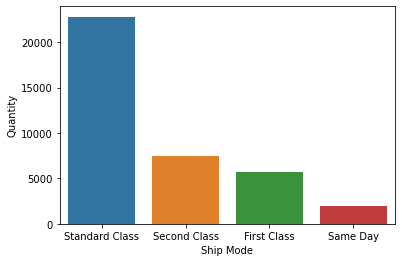

In [71]:
plt.ticklabel_format(style='plain',axis='y')
sns.barplot(x=ship_mode_quantity.index,y=ship_mode_quantity,estimator=np.sum)
plt.show()

### Ship Mode for diferent categories

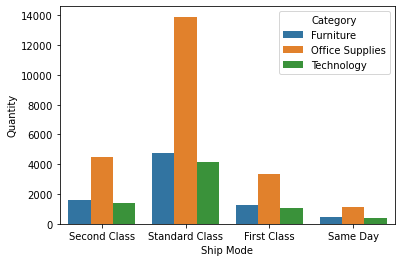

In [72]:
sns.barplot(data=sales,x='Ship Mode',y='Quantity',hue='Category',estimator=np.sum,ci=None)
plt.show()

Standard class is the preferred shipping mode according to the sale quantities

In [76]:
top_ten_profitable_customers=sales.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False)[:10]
top_ten_profitable_customers

Customer Name
Tamara Chand            8981.3239
Raymond Buch            6976.0959
Sanjit Chand            5757.4119
Hunter Lopez            5622.4292
Adrian Barton           5444.8055
Tom Ashbrook            4703.7883
Christopher Martinez    3899.8904
Keith Dawkins           3038.6254
Andy Reiter             2884.6208
Daniel Raglin           2869.0760
Name: Profit, dtype: float64